In [118]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

In [119]:
np.random.seed(0)

In [120]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


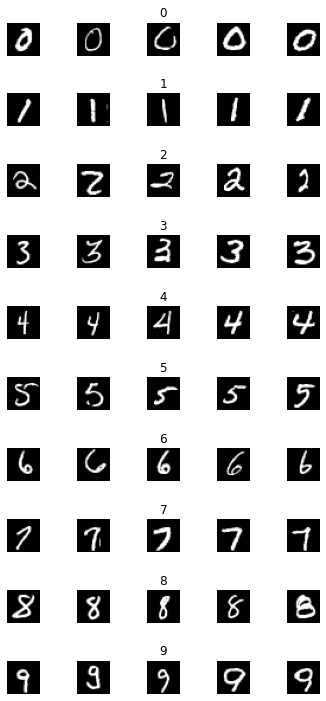

In [121]:
num_of_samples=[]
     
cols = 5
num_classes = 10
     
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
     
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


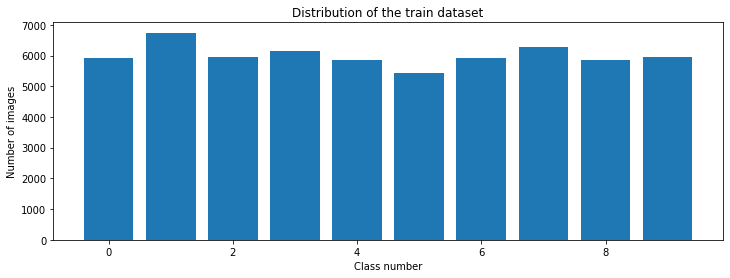

In [122]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [123]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [124]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
     
X_train = X_train/255
X_test = X_test/255

In [125]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [126]:
model = leNet_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)              

In [127]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 1s 8ms/step - loss: 0.5427 - accuracy: 0.8236 - val_loss: 0.0534 - val_accuracy: 0.9833
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.0479 - val_accuracy: 0.9867
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0575 - accuracy: 0.9826 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0334 - val_accuracy: 0.9908
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0486 - val_accuracy: 0.9888
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0370 - val_accuracy: 0.9885
Epoch 

Text(0.5, 0, 'epoch')

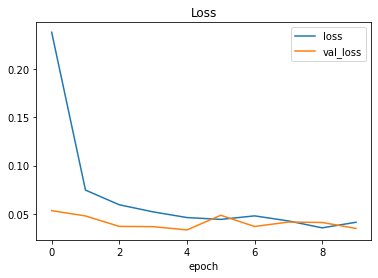

In [128]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

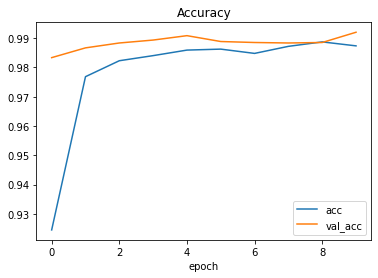

In [129]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

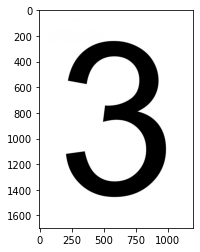

In [130]:
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg' # 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png' 
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

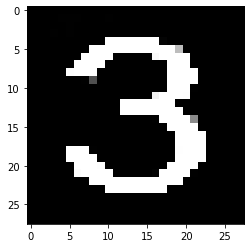

In [131]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(gray_scale)
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [132]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [133]:
prediction = model.predict_classes(img)
print("predictied digit:", str(prediction))

predictied digit: [3]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [134]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.034501828253269196
Test accuracy: 0.9898999929428101


In [135]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


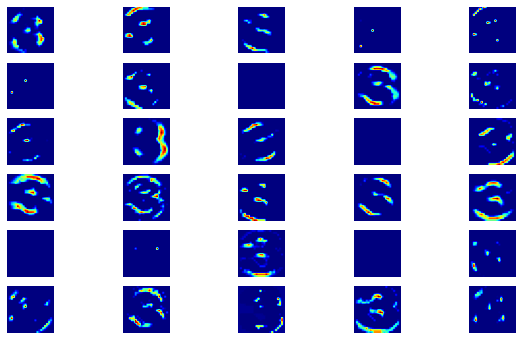

In [136]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')


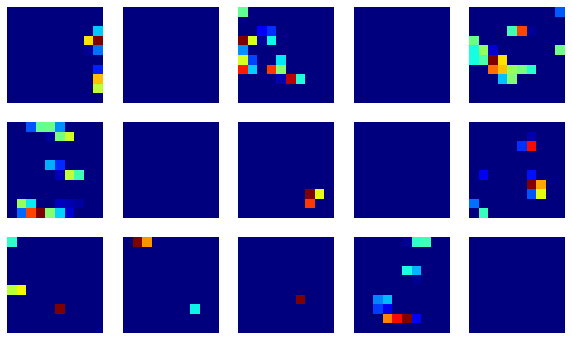

In [137]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')
